# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('./healthcare_dataset.csv')
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
# clean string (whitespace)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [4]:
# check for null values
df.isnull().sum()


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
# make Date of Admission and Date of Discharge to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


In [7]:
df.describe()


,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,10000.000000,10000,10000.000000,10000.000000,10000
mean,51.452200,2021-05-01 21:53:25.439999744,25516.806778,300.082000,2021-05-17 11:22:24.960000
min,18.000000,2018-10-30 00:00:00,1000.180837,101.000000,2018-11-01 00:00:00
25%,35.000000,2020-02-10 00:00:00,13506.523967,199.000000,2020-02-23 18:00:00
50%,52.000000,2021-05-02 00:00:00,25258.112566,299.000000,2021-05-18 00:00:00
75%,68.000000,2022-07-23 06:00:00,37733.913727,400.000000,2022-08-07 00:00:00
max,85.000000,2023-10-30 00:00:00,49995.902283,500.000000,2023-11-27 00:00:00
std,19.588974,NaN,14067.292709,115.806027,NaN


In [8]:
# describe categorical data
df.describe(include=object).transpose()


,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood Type,10000,8,AB-,1275
Medical Condition,10000,6,Asthma,1708
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance Provider,10000,5,Cigna,2040
Admission Type,10000,3,Urgent,3391
Medication,10000,5,Penicillin,2079
Test Results,10000,3,Abnormal,3456


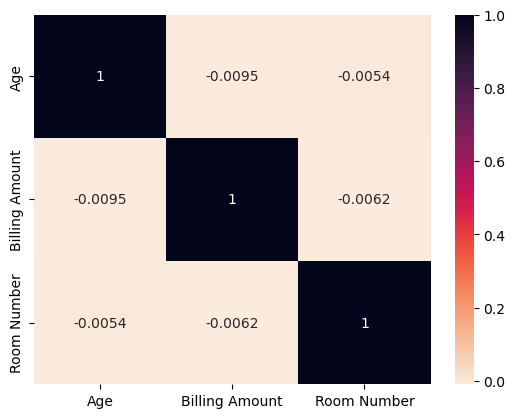

In [9]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Get correlation using heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='rocket_r')
plt.show()


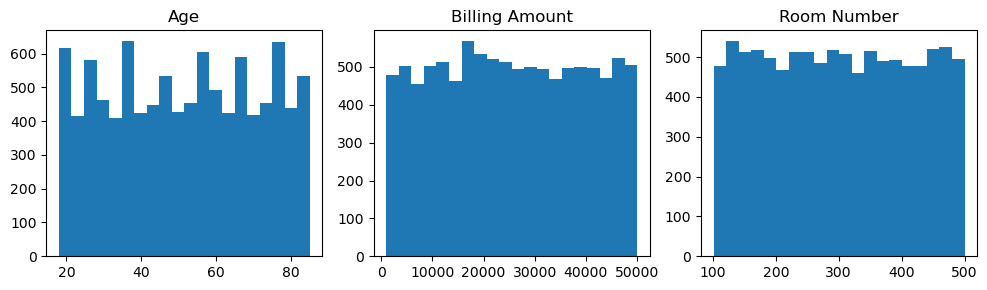

In [10]:
# show the distribution of the numerical data
fig, axs = plt.subplots(1, len(numerical_df.columns), figsize=(10, 3)) 

for i, col in enumerate(numerical_df.columns):
    axs[i].hist(numerical_df[col], bins=20)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


based on the histogram of age, billing amount, and room number we can see the even distribution of the data

In [11]:
# extract the admission and discharge day, month, year
df['Admission Day'] = df['Date of Admission'].dt.weekday
df['Admission Month'] = df['Date of Admission'].dt.month

df['Discharge Day'] = df['Discharge Date'].dt.weekday
df['Discharge Month'] = df['Discharge Date'].dt.month

df['Admission Year'] = df['Date of Admission'].dt.year
df['Discharge Year'] = df['Discharge Date'].dt.year

df['total_days'] = df['Discharge Date'] - df['Date of Admission']
df['total_days'] = df['total_days'].dt.days

df.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)

df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission Day,Admission Month,Discharge Day,Discharge Month,Admission Year,Discharge Year,total_days
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,Aspirin,Inconclusive,3,11,3,12,2022,2022,14
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,Lipitor,Normal,3,6,3,6,2023,2023,14
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,Lipitor,Normal,2,1,4,2,2019,2019,30
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,Penicillin,Abnormal,5,5,6,5,2020,2020,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,Paracetamol,Normal,4,7,0,8,2021,2021,24


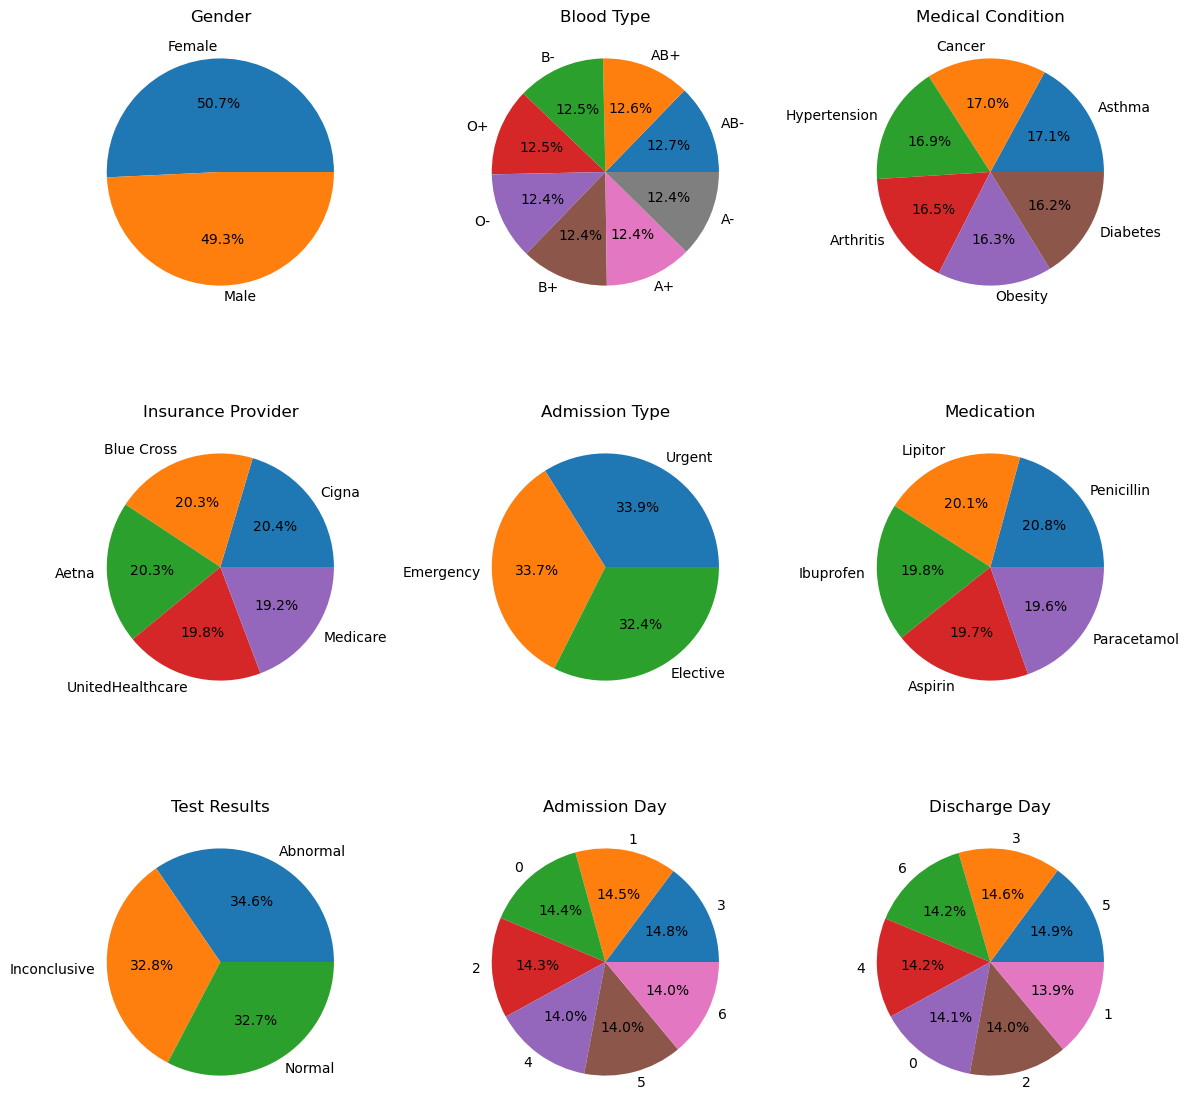

In [12]:
columns_to_show = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results', 'Admission Day', 'Discharge Day']

fig, axs = plt.subplots((len(columns_to_show) + 2) // 3, 3, figsize=(12, 12))

for i, col in enumerate(columns_to_show):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(col)
    axs[i // 3, i % 3].set_ylabel('')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 
                       'Insurance Provider', 'Admission Type', 'Medication','Test Results'
                       ]

# encode categorical data for (clustering)
encoded_df = df.copy()
# encoded_df['Name'] drop because it is not needed for clustering
encoded_df.drop(['Name'], axis=1, inplace=True)

for col in categorical_columns:
    encoded_df[col] = le.fit_transform(df[col])

encoded_df.head()


,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission Day,Admission Month,Discharge Day,Discharge Month,Admission Year,Discharge Year,total_days
0,81,0,7,3,7167,7960,3,37490.983364,146,0,0,1,3,11,3,12,2022,2022,14
1,35,1,6,1,2597,978,4,47304.064845,404,1,2,2,3,6,3,6,2023,2023,14
2,61,1,5,5,7180,7996,3,36874.896997,292,1,2,2,2,1,4,2,2019,2019,30
3,49,1,5,1,1169,2482,3,23303.322092,480,2,4,0,5,5,6,5,2020,2020,1
4,51,1,7,0,2775,3908,4,18086.344184,477,2,3,2,4,7,0,8,2021,2021,24


In [14]:
from sklearn.preprocessing import StandardScaler

# scale the numerical data
scaler = StandardScaler()
scaler.fit(encoded_df)

scaled_df = pd.DataFrame(scaler.transform(encoded_df), columns=encoded_df.columns, index=encoded_df.index)
scaled_df.head()


,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admission Day,Admission Month,Discharge Day,Discharge Month,Admission Year,Discharge Year,total_days
0,1.508465,-0.985111,1.530606,0.301166,0.904522,1.444261,0.721952,0.851249,-1.330585,-1.246353,-1.424595,0.023057,0.012590,1.298232,-0.013069,1.585102,0.807912,0.784819,-0.181360
1,-0.839912,1.015114,1.093153,-0.874117,-0.779699,-1.348605,1.429679,1.548866,0.897390,-0.018298,-0.014663,1.242984,0.012590,-0.151950,-0.013069,-0.153902,1.500448,1.482994,-0.181360
2,0.487431,1.015114,0.655699,1.476449,0.909313,1.458661,0.721952,0.807452,-0.069793,-0.018298,-0.014663,1.242984,-0.489001,-1.602132,0.487656,-1.313237,-1.269695,-1.309707,1.676598
3,-0.125189,1.015114,0.655699,-0.874117,-1.305972,-0.746991,0.721952,-0.157358,1.553693,1.209757,1.395268,-1.196870,1.015771,-0.441986,1.489107,-0.443736,-0.577159,-0.611532,-1.690950
4,-0.023086,1.015114,1.530606,-1.461758,-0.714099,-0.176577,1.429679,-0.528235,1.527786,1.209757,0.690302,1.242984,0.514181,0.138086,-1.515245,0.425766,0.115376,0.086644,0.979864


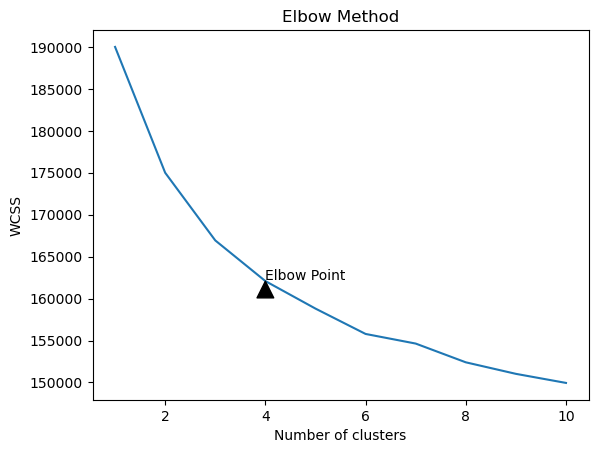

In [15]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', n_init='auto')
    kmeans.fit(scaled_df)
    WCSS.append(kmeans.inertia_)

kneedle = KneeLocator(range(1, 11), WCSS, curve='convex', direction='decreasing')
elbow_point = kneedle.knee

plt.plot(range(1, 11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.annotate('Elbow Point', xy=(elbow_point, WCSS[elbow_point-1]), xytext=(elbow_point, WCSS[elbow_point-1]+100), 
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


In [16]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=elbow_point, metric='euclidean', linkage='ward')
labels = agg.fit_predict(scaled_df)
df['Cluster'] = labels
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,...,Medication,Test Results,Admission Day,Admission Month,Discharge Day,Discharge Month,Admission Year,Discharge Year,total_days,Cluster
0,Tiffany Ramirez,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,...,Aspirin,Inconclusive,3,11,3,12,2022,2022,14,1
1,Ruben Burns,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,...,Lipitor,Normal,3,6,3,6,2023,2023,14,1
2,Chad Byrd,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,292,...,Lipitor,Normal,2,1,4,2,2019,2019,30,0
3,Antonio Frederick,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,...,Penicillin,Abnormal,5,5,6,5,2020,2020,1,3
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,...,Paracetamol,Normal,4,7,0,8,2021,2021,24,2


In [17]:
df.groupby('Cluster').agg(count=('Cluster', 'count'),
                            mean_age=('Age', 'mean'),
                            gender=('Gender', pd.Series.mode),
                            blood_type=('Blood Type', pd.Series.mode),
                            medical_condition=('Medical Condition', pd.Series.mode),
                            hospital=('Hospital', pd.Series.mode),
                            insurance_provider=('Insurance Provider', pd.Series.mode),
                            billing_amount=('Billing Amount', 'mean'),
                            admission_type=('Admission Type', pd.Series.mode),
                            medication=('Medication', pd.Series.mode),
                            test_results=('Test Results', pd.Series.mode),
                            total_days=('total_days', 'mean'),
                            admission_day=('Admission Day', pd.Series.mode),
                            discharge_day=('Discharge Day', pd.Series.mode),
                          )


,count,mean_age,gender,blood_type,medical_condition,hospital,insurance_provider,billing_amount,admission_type,medication,test_results,total_days,admission_day,discharge_day
Cluster,,,,,,,,,,,,,,
0,3134,52.312699,Male,A+,Cancer,Smith PLC,Cigna,25791.028035,Elective,Penicillin,Abnormal,15.719528,3,3
1,2291,51.302924,Male,O+,Diabetes,Smith and Sons,Aetna,26127.129431,Urgent,Penicillin,Normal,15.534265,0,6
2,2183,49.819056,Female,O-,Asthma,"[Johnson PLC, Jones Inc, Thomas Group]",Blue Cross,25462.693759,Urgent,Lipitor,Abnormal,15.235914,2,5
3,2392,51.958194,Female,A+,Hypertension,Smith PLC,UnitedHealthcare,24622.354479,Elective,Aspirin,Abnormal,15.678930,"[1, 2]",0


based on the clustering result we can see that there are 4 clusters that represent different groups of patients. Shockingly,
all of the cluster have nearly same mean of age dominated by around 50 YO, and the mean of total_days is also nearly same.

because there are no significant difference between the clusters, we can conclude that the clusters are not really useful for the sake of this exercise
we need to do more feature engineering :D, lets try to use supervised learning to check the test_result and see if we can predict the test_result based on the other features

In [22]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder(sparse_output=False)

categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 
                       'Insurance Provider', 'Admission Type', 'Medication'
                       ]

oh_encoded_df = df.copy()
oh_encoded_df.drop(['Name', 'Cluster', 'Doctor', 'Hospital'], axis=1, inplace=True)

for col in categorical_columns:
    one_hot = oh.fit_transform(oh_encoded_df[[col]])
    one_hot_df = pd.DataFrame(one_hot, columns=oh.get_feature_names_out([col]))
    oh_encoded_df = pd.concat([oh_encoded_df, one_hot_df], axis=1)
    oh_encoded_df = oh_encoded_df.drop(col, axis=1)

oh_encoded_df['Test Results'] = le.fit_transform(oh_encoded_df['Test Results'])
oh_encoded_df.head()


,Age,Billing Amount,Room Number,Test Results,Admission Day,Admission Month,Discharge Day,Discharge Month,Admission Year,Discharge Year,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,81,37490.983364,146,1,3,11,3,12,2022,2022,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,35,47304.064845,404,2,3,6,3,6,2023,2023,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,61,36874.896997,292,2,2,1,4,2,2019,2019,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,49,23303.322092,480,0,5,5,6,5,2020,2020,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,51,18086.344184,477,2,4,7,0,8,2021,2021,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [23]:
from sklearn.model_selection import train_test_split

X = oh_encoded_df.drop('Test Results', axis=1).values
y = oh_encoded_df['Test Results'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42, objective='multi:softmax')
bst.fit(X_train, y_train)

y_pred = bst.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.327

bruhh....... Even with supervised learning, the accuracy is so.. low, to conclude, it may happen because the data distribution is not really good, and there is actually very low correlation between the features with the target variable which put emphasis on the fact that we need more feature